# K Means Alogorithm Theory

Review Chapter 10 of Introduction to Statistical Learning (Gareth James et al.)

http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf


* K-Means Clustering is an unsupervised learning algorithm (takes in unlabelled data) that will attempt to group similar clusters together in your dataset
* Not predicting an outcome, but finding patterns in the data
* **What does a typical problem look like?**
    * cluster similar documents
    * cluster customers based on features
    * market segmentation
    * identify similar physical groups
* The overall goal is to divide data into distinct groups such that observations within each group are similar
* **How the K Means algorithm works**
    * first choose a number of clusters 'K'
    * randomly assign each point to a cluster
    * until clusters stop changing, repeat the following:
        * for each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
        * assign each data point to the cluster for which the centroid is the closest
* **Choosing K**
    * There is no easy answer for choosing a "best" K value
    * One way is the Elbow method
        * first, compute the sum of squared error (SSE) for some values of k (for example 2,4,6,6, etc..)
        * The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid
        * Plot K against the SSE, you'll see that error decreases as K increases
        * This is because when the number when the numbe rof clusters increases, they should be smaller, so distortion is also smaller
        * The idea of te elbow method is to choose the K at which the SSE decreases abruptly
        * This produces an "elbow effect" in the graph
    * Also use domain experience to choose a correct K vlaue
        

___

___
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
# only viz libraries needed
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [2]:
# create fake data using sklearn
from sklearn.datasets import make_blobs

In [3]:
# generates blob like groups of data
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

In [15]:
data
# tuple

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [9]:
# Numpy Array of lists (coords)
data[0][:5]

array([[-6.42884095, 10.14111739],
       [ 5.86867888,  5.20110356],
       [-0.37610937,  3.26427943],
       [ 2.16679181,  9.56300522],
       [ 5.0950857 ,  7.20752718]])

In [11]:
data[0].shape
# 200 samples, with 2 features

(200, 2)

In [14]:
# cluster number for the coords
# we created 4 clusters
data[1][:5]

array([3, 2, 0, 2, 2])

## Visualize Data

In [26]:
sns.set_style('darkgrid')

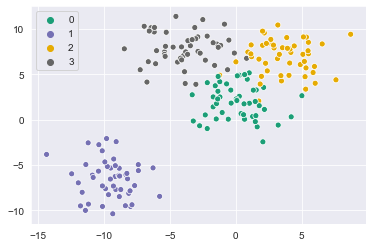

In [48]:
sns.scatterplot(data[0][:,0], data[0][:,1], hue=data[1], palette='Dark2')

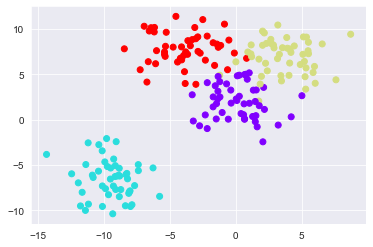

In [43]:
# plot x (rows in first col 0) versus y (rows in second col 1)
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

## Creating the Clusters

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=4)

In [51]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
# Centroids
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [53]:
# return the labels models believes each cluster belongs to
kmeans.labels_

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 3, 2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 3, 2, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 2,
       3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 3,
       1, 0])

Text(0.5, 1.0, 'K Means')

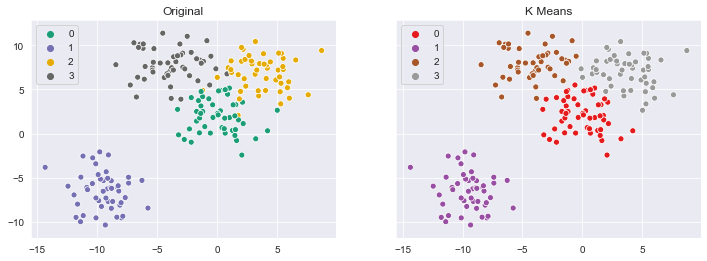

In [74]:
#fig, axes =plt.subplots(1,2)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,4)) # sharey for sharing axes
sns.scatterplot(data[0][:,0], data[0][:,1], hue=data[1], palette='Dark2',ax=ax1)
sns.scatterplot(data[0][:,0], data[0][:,1], hue=kmeans.labels_, palette='Set1', ax=ax2)
ax1.set_title("Original")
ax2.set_title('K Means')
# slide differences
# We can only compare the K Means labels to the orginal because we have the orginal labels
# In reality you would not have label, as thats the whole point of unsupervised learning, to find labels, not predict them

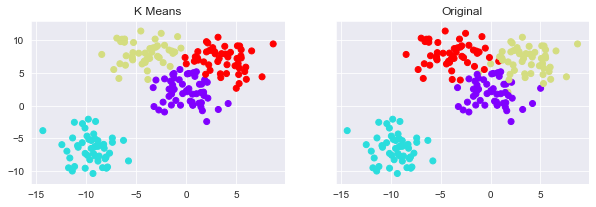

In [75]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,3))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.